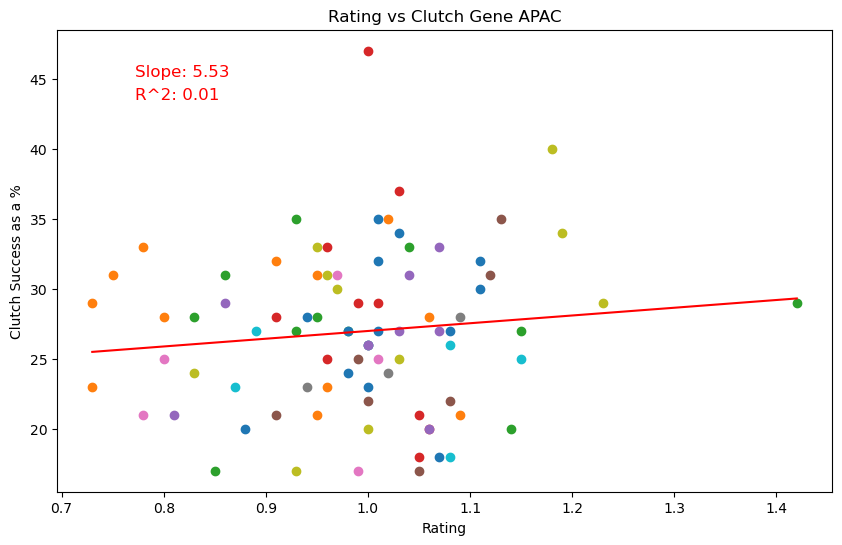

In [33]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# API endpoint
endpoint = "https://vlrggapi.vercel.app/stats/ap/60"

# Fetch data from the API
response = requests.get(endpoint)

if response.status_code != 200:
    print("Error: Unable to fetch data from the API")
    exit()

data = response.json()["data"]["segments"]

# Extract and filter the relevant data
filtered_data = []
for player in data:
    org = player.get("org", "N/A")  # Handle the case where "org" is missing
    average_combat_score = float(player.get("average_combat_score", 0.0))
    clutch_success_percentage = float(player.get("clutch_success_percentage", "0%")[:-1])  # Convert to float and remove "%" symbol
    filtered_data.append({
        "org": org,
        "player": player["player"],
        "average_combat_score": average_combat_score,
        "clutch_success_percentage": clutch_success_percentage,
    })

# Create a DataFrame from the filtered data
df = pd.DataFrame(filtered_data)

# Create a scatter plot for all players
plt.figure(figsize=(10, 6))
for name, group in df.groupby("org"):
    plt.scatter(group["average_combat_score"], group["clutch_success_percentage"])
   

# Calculate and add a single linear regression line for all data
slope, intercept, r_value, p_value, std_err = linregress(df["average_combat_score"], df["clutch_success_percentage"])
x_values = np.array(df["average_combat_score"])
plt.plot(x_values, intercept + slope * x_values, color="red")

# Add labels for slope and R^2 coefficient on the plot
slope_label = f"Slope: {slope:.2f}"
r2_label = f"R^2: {r_value**2:.2f}"
plt.text(0.1, 0.9, slope_label, color="red", fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, r2_label, color="red", fontsize=12, transform=plt.gca().transAxes)

plt.xlabel("Rating")
plt.ylabel("Clutch Success as a %")
plt.title("Rating vs Clutch Gene APAC")
plt.show()
